In [1]:
## Jupyter notebook in python

## Caveat: 

In [ ]:
import analogue_functions_C3S as my

import xarray as xr
import os
import subprocess
import numpy as np
import iris
import calendar
import matplotlib.pyplot as plt
import matplotlib
cmaps = matplotlib.colormaps
import sys
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cf
import netCDF4 as nc
import glob
from iris.util import equalise_attributes
from iris.util import unify_time_units


In [ ]:
# Defining the variables:
date = [2025, 'May', 17]; # Date to assess
R1 = [80, 40, 30, -30] # Analogues domain
ana_var = 'z500' # Circulation variable, 'msl' or 'z500'

R2 = [80, 30, 30, -50] # Domain to plot composites with significance - can be larger than R1

In [6]:
### Automated variables - can be adjusted for sensitivity testing

# months to include, automatically three calendar month window around the event
month = date[1]
X = list(calendar.month_abbr)
i=X.index(month)
if 1<i<12:
    months = [X[i-1], X[i], X[i+1]]
elif i == 1:
    months = [X[12], X[i], X[i+1]]
elif i ==12:
    months = [X[i-1], X[i], X[1]]

# Or use this line to manually select different month set (can be full year)
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months = ['Mar','Apr','May']

# start and end of timeslices. Both timeslices should be same length for fair comparison
Y1 = 1950 # timeslice 1 start year
Y2 = 1980 # timeslice 1 end year
Y3 = 1994 # timeslice 2 start year
Y4 = 2024 # timeslice 2 end year

# number of analogues to use - set at 1% (assuming 30 day months) of timeslice 1 days 
N = int(((Y2-Y1)*len(months)*30)/100)
# Or use this line to manually select N
# N = 30

In [7]:
# Check if using ERA5 or extended forecast (for when ERA5 not yet available)
event_data = 'era5'
# Initially using ERA5 daily data, if that gives no data switch to extended:
if my.reanalysis_data_single_date('t2m', date)==None:
    my.ERA5FILESUFFIX = "_daily_extended"
    event_data = "extended"
    print('ERA5 data not yet available, using ECMWF extended forecast for event data')

# If extended also not available give error message:
if my.reanalysis_data_single_date('t2m', date)==None:
    print('Data is not available for that date, please select a date between 1 Jan 1950 and the present day')
    quit() ## If the date has not data (ERA5 or extended) then stop here, and print message above

# Check what it is using:
my.ERA5FILESUFFIX

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'May', 17]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'May', 17]


'_daily'

In [8]:
dates_past = my.anomaly_period_outputs(Y1, Y2, ana_var, N, date, months, R1)
dates_prst = my.anomaly_period_outputs(Y3, Y4, ana_var, N, date, months, R1)


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

In [9]:
# ANALOGUE COMPOSITES
def analogues_composite_anomaly(DATES, ana_var, R1):
    P1_msl = my.reanalysis_data(ana_var, 1950, 2025, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
    P1_field = my.extract_region(P1_msl, R1) # Extract the analogues domain (R1) from global field    
    P1_spatialmean = P1_field.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)   # Calculate spatial mean for each day
    P1_field = P1_field - P1_spatialmean # Remove spatial mean from each day
    P1_comp = my.composite_dates_anomaly(P1_field, DATES) # composite analogues
    return P1_comp

def analogues_composite(DATES, ana_var, R1):
    P1_msl = my.reanalysis_data(ana_var, 1950, 2025, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
    P1_field = my.extract_region(P1_msl, R1) # Extract the analogues domain (R1) from global field    
    P1_comp = my.composite_dates(P1_field, DATES) # composite analogues
    return P1_comp

In [10]:
def background_0(ax):
    ax.coastlines(linewidth=0.4)
    #ax.add_feature(cf.BORDERS, lw = 1, alpha = 0.7, ls = "--", zorder = 99)
    gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.2, color='k',alpha=0.5,linestyle='--')
    gl.right_labels =gl.left_labels = gl.top_labels = gl.bottom_labels= False
    gl.xlabel_style = {'size': 5, 'color': 'gray'}
    gl.ylabel_style = {'size': 5, 'color': 'gray'}
    

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Text(0.5, 0.98, 'Analogue Variable: z500')

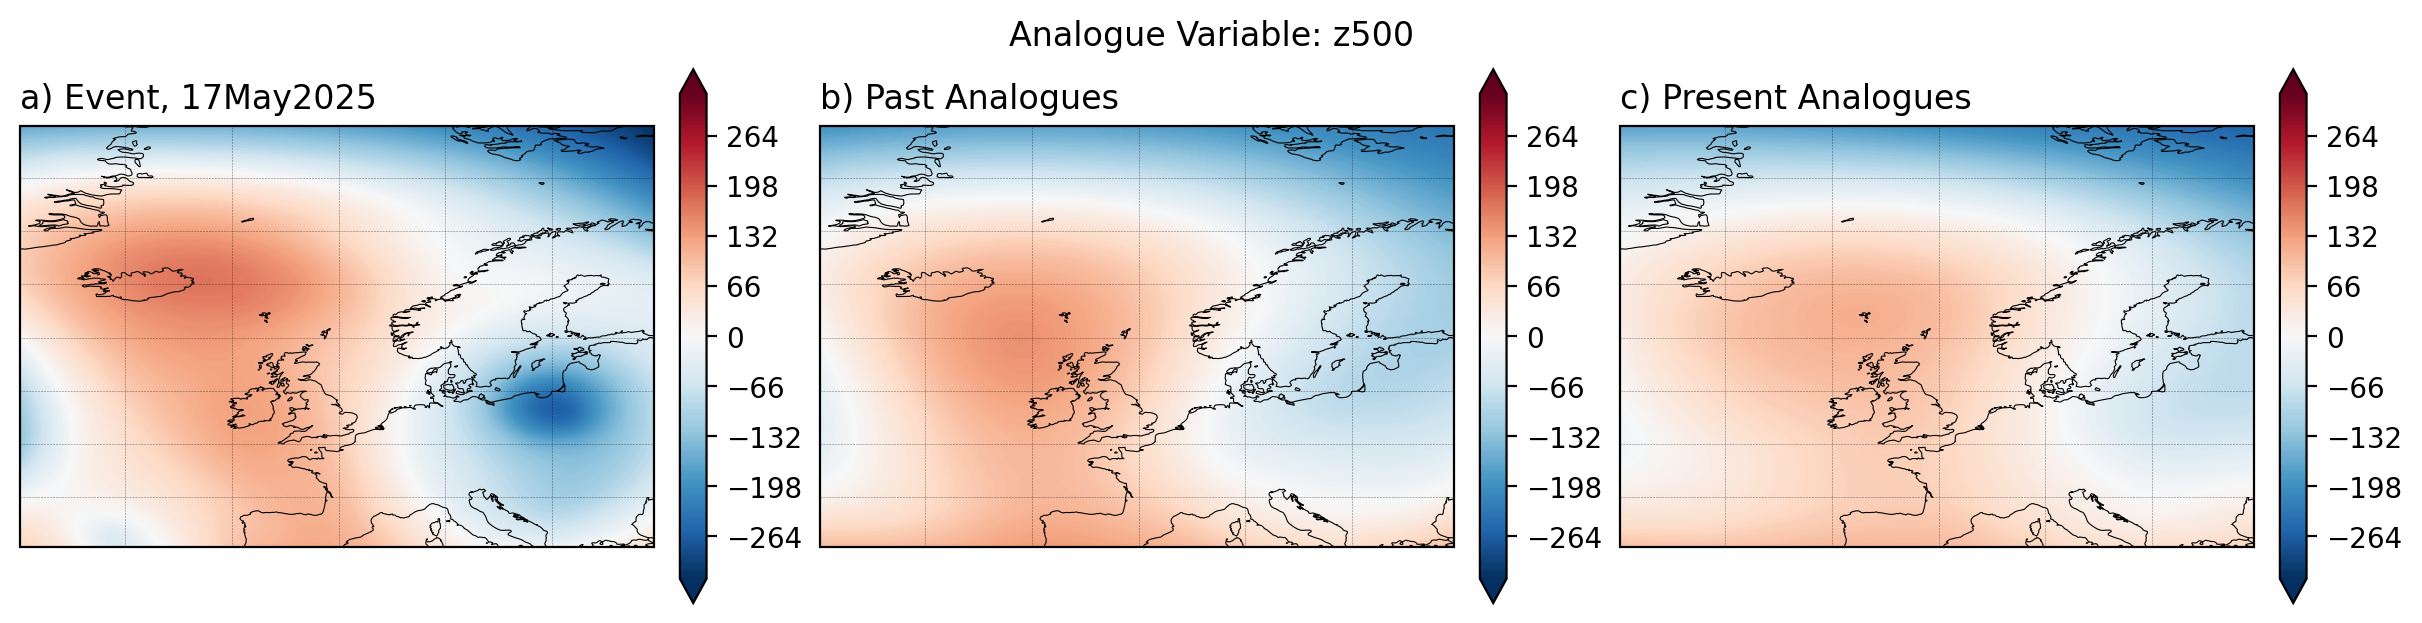

In [11]:
# Plot: Analogue variable

# EVENT FIELDS
E = my.extract_region(my.reanalysis_data_single_date(ana_var, date), R1)
E = E - E.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)

# ANALOGUE COMPOSITES
PRST_comp = analogues_composite_anomaly(dates_prst, ana_var, R1)
PAST_comp = analogues_composite_anomaly(dates_past, ana_var, R1)

if ana_var == 'z500':
    PAST_comp = PAST_comp/10
    PRST_comp = PRST_comp/10
    E = E/10

fig = plt.figure(figsize=(12,3),layout='constrained',dpi=200)

lats=PRST_comp.coord('latitude').points
lons=PRST_comp.coord('longitude').points

x= np.round(np.arange(0, np.max([np.abs(PAST_comp.data), np.abs(PRST_comp.data), np.abs(E.data)]), 2))
con_lev=np.append(-x[::-1][:-1],x)

ax= plt.subplot(1,3,1,projection=ccrs.PlateCarree())
c1 = ax.contourf(lons, lats, E.data, levels=con_lev, cmap="RdBu_r", transform=ccrs.PlateCarree(), extend='both')
cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
cbar.ax.tick_params()
ax.set_title('a) Event, '+str(date[2])+date[1]+str(date[0]), loc='left')
background_0(ax)

ax= plt.subplot(1,3,2,projection=ccrs.PlateCarree())
c1 = ax.contourf(lons, lats, PAST_comp.data, levels=con_lev, cmap="RdBu_r", transform=ccrs.PlateCarree(), extend='both')
cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
cbar.ax.tick_params()
ax.set_title('b) Past Analogues', loc='left')
background_0(ax)

ax= plt.subplot(1,3,3,projection=ccrs.PlateCarree())
c1 = ax.contourf(lons, lats, PRST_comp.data, levels=con_lev, cmap="RdBu_r", transform=ccrs.PlateCarree(), extend='both')
cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
cbar.ax.tick_params()
ax.set_title('c) Present Analogues', loc='left')
background_0(ax)

fig.suptitle('Analogue Variable: '+ana_var)

In [12]:

if ana_var == 'z500':
    var_list = ['z500', 'msl', 'tp', 't2m']
elif ana_var == 'msl':
    var_list = ['msl', 'z500', 'tp', 't2m']
    


In [13]:
sig_field = []
for each in var_list:
    sig_field.append(my.diff_significance(my.extract_region(my.reanalysis_data(each, Y1, Y2, months), R2), dates_past, my.extract_region(my.reanalysis_data(each, Y3, Y4, months), R2), dates_prst))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


z500
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]
msl
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_msl_daily.nc for date [2025, 'May', 17]
tp
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_tp_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)


t2m
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'May', 17]


Text(0.0, 1.0, 'p) ')

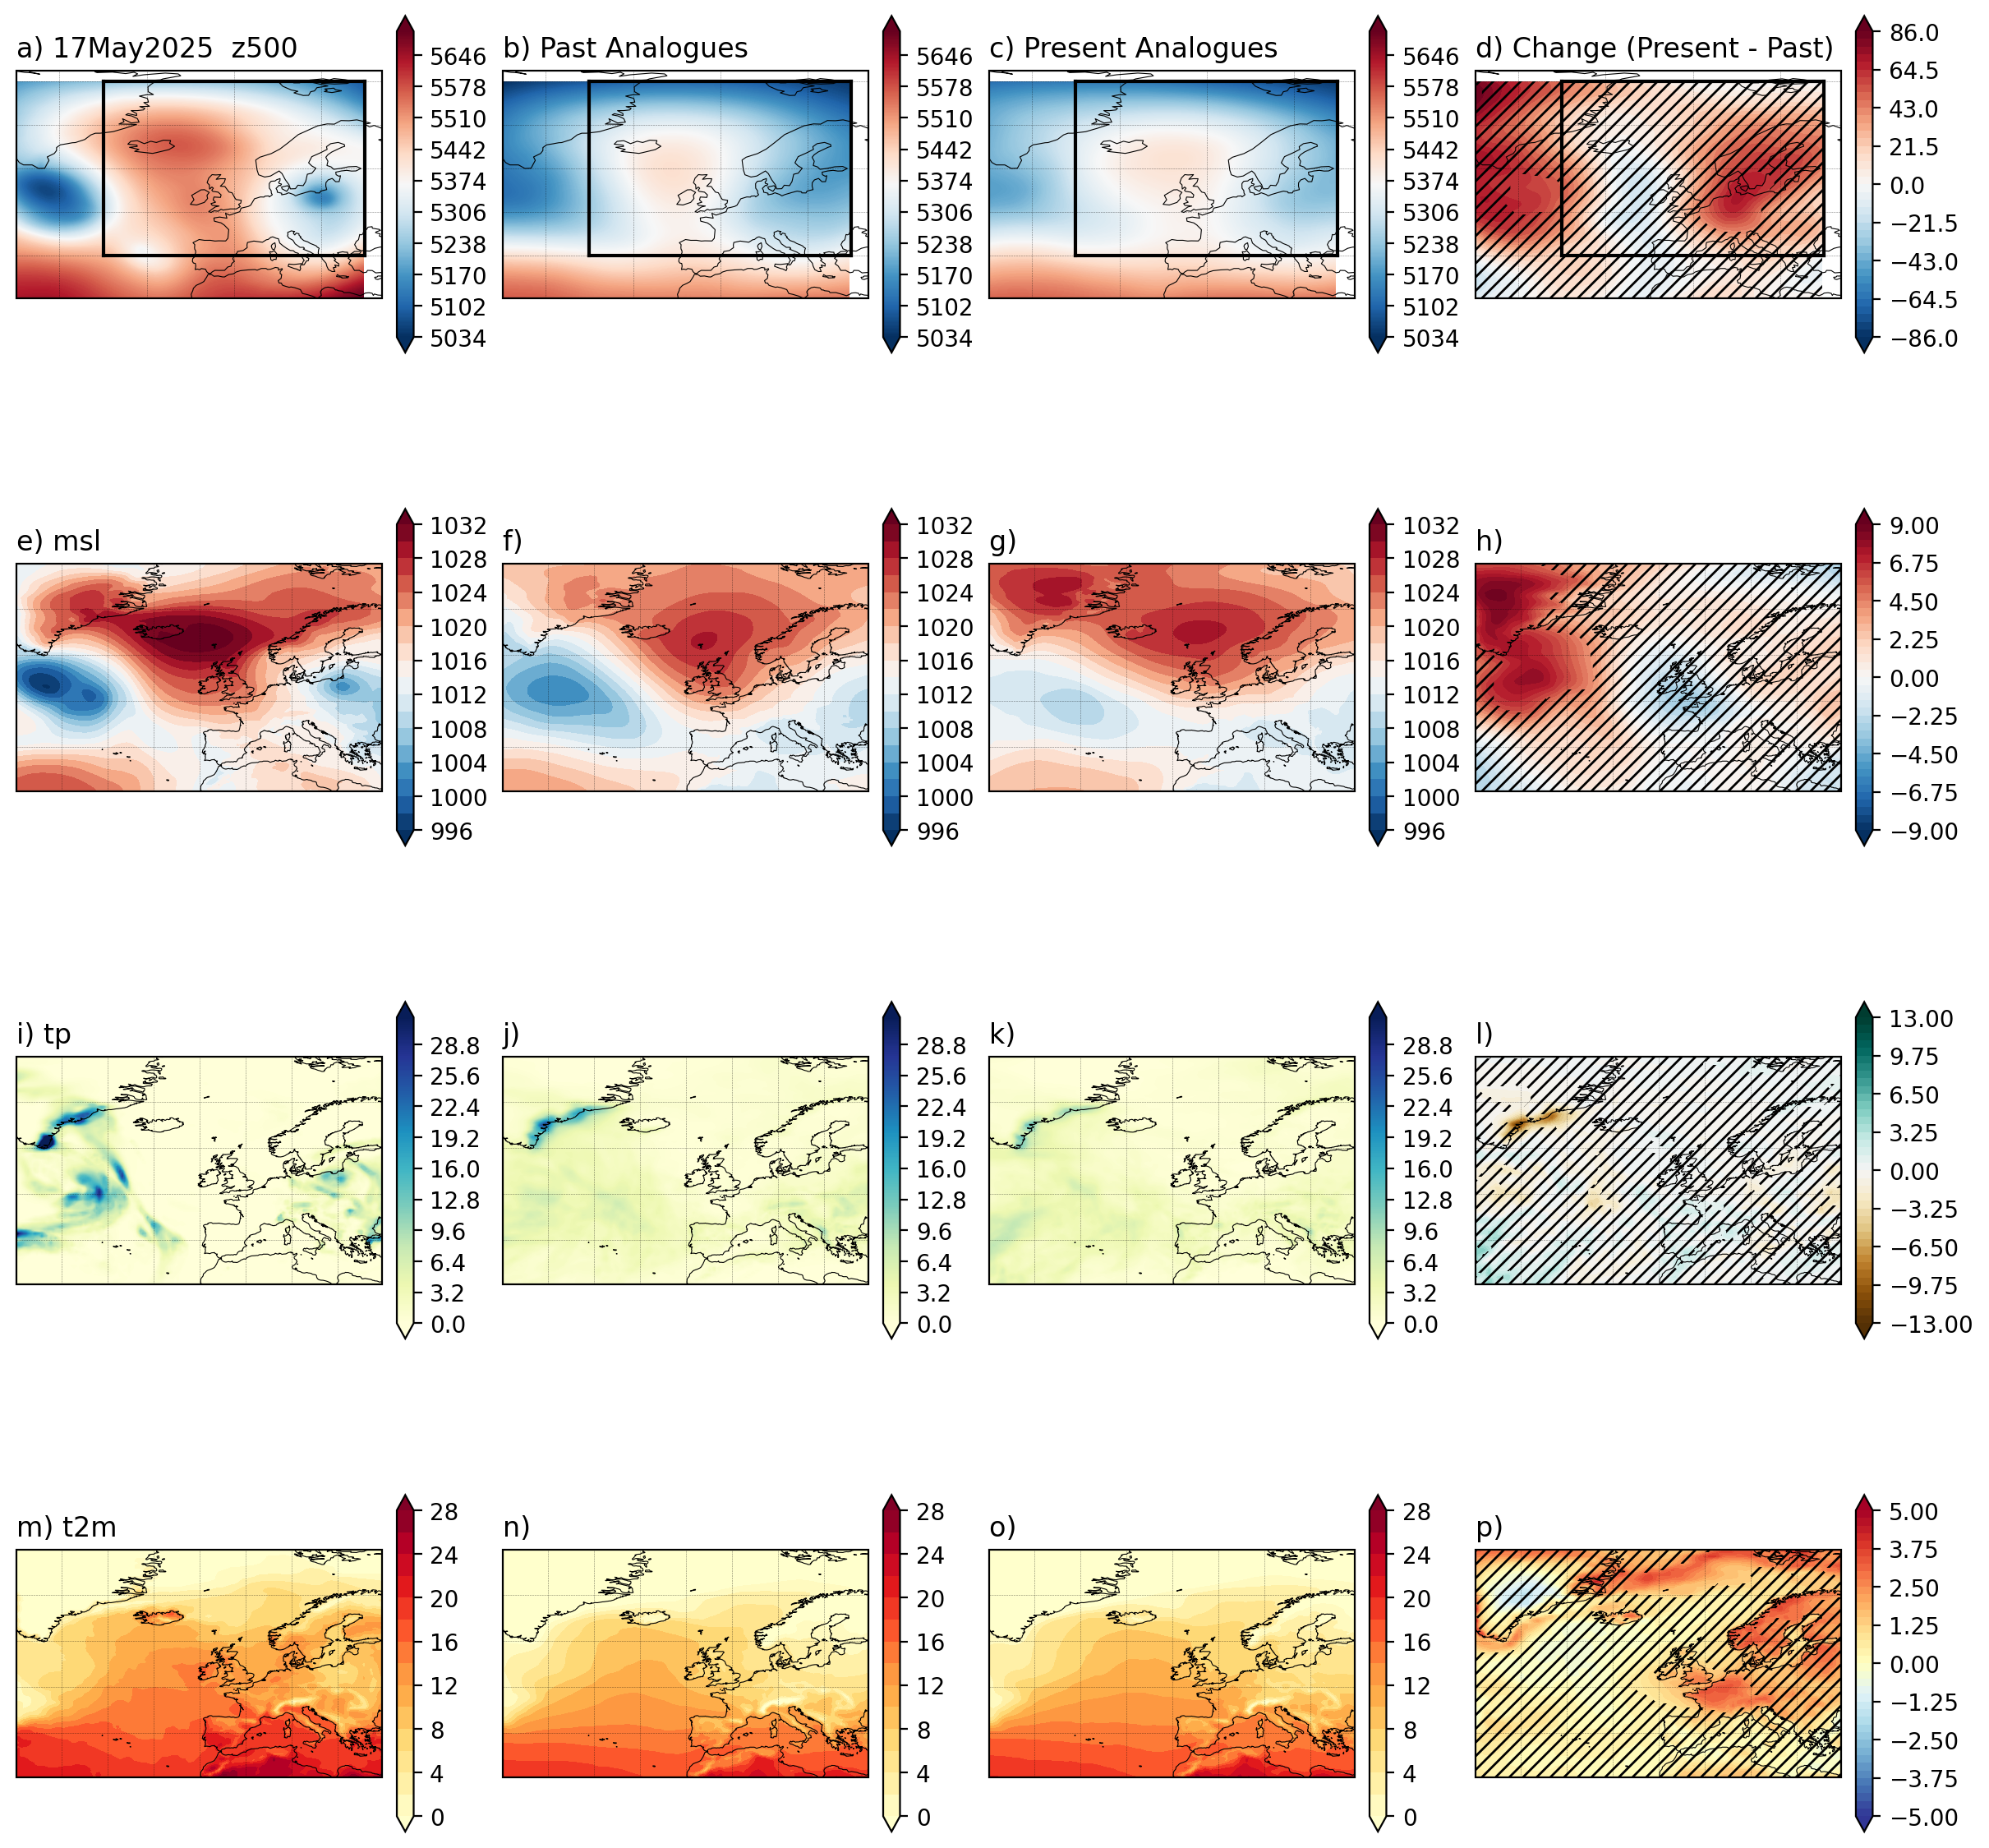

In [17]:
# Plot: Z500, SLP, t2m, tp (ToDo: +winds when ERA5 not extended)
fig = plt.figure(figsize=(12,12),layout='constrained',dpi=200)

for i, var in enumerate(var_list):
    print(var)
    if var == 'z500' or var == 'msl': CMAP = ["RdBu_r", "RdBu_r"]
    if var == 'tp': CMAP = ["YlGnBu", "BrBG"]
    if var == 't2m': CMAP = ["YlOrRd", "RdYlBu_r"]
    # EVENT FIELDS
    E = my.extract_region(my.reanalysis_data_single_date(var, date), R2)
    #if var == 'z500':
    #    E = E - E.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)
    # ANALOGUE COMPOSITES
    PRST_comp = analogues_composite(dates_prst, var, R2)
    PAST_comp = analogues_composite(dates_past, var, R2)
    # Unit conversions
    if var == 'z500':
        PAST_comp = PAST_comp*0.0980665
        PRST_comp = PRST_comp*0.0980665
        E = E*0.0980665
    if var == 'msl':
        PAST_comp = PAST_comp*.01
        PRST_comp = PRST_comp*.01
        E = E*.01    
    if var == 't2m':
        PAST_comp = PAST_comp-273.15
        PRST_comp = PRST_comp-273.15
        E = E-273.15   
    lats=PRST_comp.coord('latitude').points
    lons=PRST_comp.coord('longitude').points 
    if var == 'z500' or var == 'msl':  
        con_lev = np.round(np.arange(np.min([PAST_comp.data, PRST_comp.data, E.data]), np.max([PAST_comp.data, PRST_comp.data, E.data]), 2))
    if var == 't2m':
        con_lev = np.round(np.arange(0, np.max([PAST_comp.data, PRST_comp.data, E.data]), 2))
    if var == 'tp':
        con_lev = np.arange(0, np.max([PAST_comp.data,PRST_comp.data, E.data])/2, .2)
    # Plotting event
    ax= plt.subplot(len(var_list),4,(i*4)+1,projection=ccrs.PlateCarree())
    c1 = ax.contourf(lons, lats, E.data, levels=con_lev, cmap=CMAP[0], transform=ccrs.PlateCarree(), extend='both')
    cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
    cbar.ax.tick_params()
    ax.set_ylabel(var)
    background_0(ax)
    # Plotting Past Composite
    ax= plt.subplot(len(var_list),4,(i*4)+2,projection=ccrs.PlateCarree())
    c1 = ax.contourf(lons, lats, PAST_comp.data, levels=con_lev, cmap=CMAP[0], transform=ccrs.PlateCarree(), extend='both')
    cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
    cbar.ax.tick_params()
    background_0(ax)
    # Plotting Present Composite
    ax= plt.subplot(len(var_list),4,(i*4)+3,projection=ccrs.PlateCarree())
    c1 = ax.contourf(lons, lats, PRST_comp.data, levels=con_lev, cmap=CMAP[0], transform=ccrs.PlateCarree(), extend='both')
    cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
    cbar.ax.tick_params()
    background_0(ax)
    # Plotting Change
    ax= plt.subplot(len(var_list),4,(i*4)+4,projection=ccrs.PlateCarree())
    Dmax = np.round(np.nanmax(np.abs([np.nanmin((PRST_comp-PAST_comp).data), np.nanmax((PRST_comp-PAST_comp).data)])))
    diff_lev = np.linspace(-Dmax, Dmax, 41)
    c1 = ax.contourf(lons, lats, (PRST_comp-PAST_comp).data, levels=diff_lev, cmap=CMAP[1], transform=ccrs.PlateCarree(), extend='both')
    c2 = ax.contourf(lons, lats, sig_field[i].data, levels=[-2, 0, 2], hatches=['////', None], colors='none', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(c1,fraction=0.046, pad=0.04)
    cbar.ax.tick_params()
    background_0(ax)
    #fig.suptitle('Analogue Variable: '+ana_var)

ax= plt.subplot(4,4,1,projection=ccrs.PlateCarree())    
ax.set_title('a) '+str(date[2])+date[1]+str(date[0])+'  '+var_list[0], loc='left')
my.plot_box(ax, R1)
ax= plt.subplot(4,4,2,projection=ccrs.PlateCarree())  
ax.set_title('b) Past Analogues', loc='left')
my.plot_box(ax, R1)
ax= plt.subplot(4,4,3,projection=ccrs.PlateCarree())  
ax.set_title('c) Present Analogues', loc='left')
my.plot_box(ax, R1)
ax= plt.subplot(4,4,4,projection=ccrs.PlateCarree())  
ax.set_title('d) Change (Present - Past)', loc='left')
my.plot_box(ax, R1)


plt.subplot(4,4,5,projection=ccrs.PlateCarree()) .set_title('e) '+var_list[1], loc='left')
plt.subplot(4,4,6,projection=ccrs.PlateCarree()) .set_title('f) ', loc='left')
plt.subplot(4,4,7,projection=ccrs.PlateCarree()) .set_title('g) ', loc='left')
plt.subplot(4,4,8,projection=ccrs.PlateCarree()) .set_title('h) ', loc='left')

plt.subplot(4,4,9,projection=ccrs.PlateCarree()) .set_title('i) '+var_list[2], loc='left')
plt.subplot(4,4,10,projection=ccrs.PlateCarree()) .set_title('j) ', loc='left')
plt.subplot(4,4,11,projection=ccrs.PlateCarree()) .set_title('k) ', loc='left')
plt.subplot(4,4,12,projection=ccrs.PlateCarree()) .set_title('l) ', loc='left')

plt.subplot(4,4,13,projection=ccrs.PlateCarree()) .set_title('m) '+var_list[3], loc='left')
plt.subplot(4,4,14,projection=ccrs.PlateCarree()) .set_title('n) ', loc='left')
plt.subplot(4,4,15,projection=ccrs.PlateCarree()) .set_title('o) ', loc='left')
plt.subplot(4,4,16,projection=ccrs.PlateCarree()) .set_title('p) ', loc='left')


In [ ]:
# Summary print out
print('Summary: identify analogues domain')
print('Event definition:')
print('     Date: ', date)
print('Analogue calulation:')
print('     Months assessed: ', months)
print('     Number of analogues: ', N)
print('     Analogue domain: ', R1)
print('     Circulation variable: ', ana_var)
print('Timeslices:')
print('      Past: ',Y1,'-',Y2)
print('      Present: ',Y3,'-',Y4)
print('Plotted domain: ', R2)


Summary: identify analogues domain
Event definition:
     Date:  [2023, 'Jun', 22]
Analogue calulation:
     Months assessed:  ['Jun', 'Jul', 'Aug']
     Number of analogues:  27
     Analogue domain:  [50, 30, 140, 105]
     Circulation variable:  z500
Timeslices:
      Past:  1950 - 1980
      Present:  1994 - 2024
Plotted domain:  [60, 20, 150, 90]


: 